In [ ]:
# dataset_to_be_evaluated_name = "MODEL_vllm_MODELNAME_Llama-3.2-3B-Instruct_UMBRALMIN_100_CANTXCALL_5_MAXINP_5_TEMP_0.5_FREQPEN_0.0_PRESENCEPEN_0.0"
# dataset_to_be_evaluated_name = "MODEL_vllm_MODELNAME_meta-llama-Llama-3.2-3B-Instruct_UMBRALMIN_250_CANTXCALL_5_MAXINP_5_TEMP_0.5_FREQPEN_0.0_PRESENCEPEN_0.0"
# dataset_to_be_evaluated_name = "MODEL_vllm_MODELNAME_meta-llama-Llama-3.2-3B-Instruct_UMBRALMIN_500_CANTXCALL_5_MAXINP_5_TEMP_0.5_FREQPEN_0.0_PRESENCEPEN_0.0"
# dataset_to_be_evaluated_name = "MODEL_vllm_MODELNAME_meta-llama-Llama-3.2-3B-Instruct_UMBRALMIN_1000_CANTXCALL_5_MAXINP_5_TEMP_0.5_FREQPEN_0.0_PRESENCEPEN_0.0"


# dataset_to_be_evaluated_name = "MODEL_vllm_MODELNAME_meta-llama-Llama-3.2-3B-Instruct_UMBRALMIN_100_CANTXCALL_5_MAXINP_5_TEMP_0.5_FREQPEN_1.0_PRESENCEPEN_1.0"
# dataset_to_be_evaluated_name = "MODEL_vllm_MODELNAME_meta-llama-Llama-3.2-3B-Instruct_UMBRALMIN_250_CANTXCALL_5_MAXINP_5_TEMP_0.5_FREQPEN_1.0_PRESENCEPEN_1.0"
# dataset_to_be_evaluated_name = "MODEL_vllm_MODELNAME_meta-llama-Llama-3.2-3B-Instruct_UMBRALMIN_500_CANTXCALL_5_MAXINP_5_TEMP_0.5_FREQPEN_1.0_PRESENCEPEN_1.0"
# dataset_to_be_evaluated_name = "MODEL_vllm_MODELNAME_meta-llama-Llama-3.2-3B-Instruct_UMBRALMIN_1000_CANTXCALL_5_MAXINP_5_TEMP_0.5_FREQPEN_1.0_PRESENCEPEN_1.0"

# dataset_to_be_evaluated_name = "MODEL_openai_MODELNAME_gpt-4o-mini_UMBRALMIN_100_CANTXCALL_5_MAXINP_5_TEMP_0.5_FREQPEN_0.0_PRESENCEPEN_0.0"
# dataset_to_be_evaluated_name = "MODEL_openai_MODELNAME_gpt-4o-mini_UMBRALMIN_250_CANTXCALL_5_MAXINP_5_TEMP_0.5_FREQPEN_0.0_PRESENCEPEN_0.0"
dataset_to_be_evaluated_name = "MODEL_openai_MODELNAME_gpt-4o-mini_UMBRALMIN_500_CANTXCALL_5_MAXINP_5_TEMP_0.5_FREQPEN_0.0_PRESENCEPEN_0.0"
# dataset_to_be_evaluated_name = "MODEL_openai_MODELNAME_gpt-4o-mini_UMBRALMIN_1000_CANTXCALL_15_MAXINP_5_TEMP_0.5_FREQPEN_0.0_PRESENCEPEN_0.0"
# dataset_to_be_evaluated_name = "MODEL_openai_MODELNAME_gpt-4o-mini_UMBRALMIN_100_CANTXCALL_5_MAXINP_5_TEMP_0.5_FREQPEN_1.0_PRESENCEPEN_1.0"
# dataset_to_be_evaluated_name = "MODEL_openai_MODELNAME_gpt-4o-mini_UMBRALMIN_250_CANTXCALL_5_MAXINP_5_TEMP_0.5_FREQPEN_1.0_PRESENCEPEN_1.0"
# dataset_to_be_evaluated_name = "MODEL_openai_MODELNAME_gpt-4o-mini_UMBRALMIN_500_CANTXCALL_5_MAXINP_5_TEMP_0.5_FREQPEN_1.0_PRESENCEPEN_1.0"
# dataset_to_be_evaluated_name = "MODEL_openai_MODELNAME_gpt-4o-mini_UMBRALMIN_1000_CANTXCALL_15_MAXINP_5_TEMP_0.5_FREQPEN_1.0_PRESENCEPEN_1.0"
dataset_to_be_evaluated_path = f"../data/generated/{dataset_to_be_evaluated_name}.csv"

## Imports

In [ ]:
import sys
import pandas as pd
import os
import ast
from sentence_transformers import SentenceTransformer, util
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
from collections import Counter
import re
import json
import numpy as np


sys.path.append(os.path.abspath(".."))

c:\Users\Alonso\Documents\## UPM\TFM\git\TFM\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import torch

print("CUDA available:", torch.cuda.is_available())
print("Device count:", torch.cuda.device_count())
print("Current device:", torch.cuda.current_device())
print("Device name:", torch.cuda.get_device_name(torch.cuda.current_device()) if torch.cuda.is_available() else "No GPU")

CUDA available: True
Device count: 1
Current device: 0
Device name: NVIDIA GeForce RTX 4090


In [4]:
from tfm.ai_generated_detection.ai_generated_detection_models import (
    FakespotAIDetectorModel,
    calculate_ai_human_metrics
)

from tfm.ngrams.ngrams_study import evaluar_ngramas

from tfm.train_models.Hugo_Embeddings_to_classification_model import run_model_training_embeddings_to_classification_model

In [5]:
evaluacion_dataset = {}

## Leer datos

In [6]:
with open(dataset_to_be_evaluated_path.replace('.csv', '.json'), 'r', encoding='utf-8') as f:
    dataset_parameters = json.load(f)
dataset_parameters

{'creation_timestamp': '2025-06-25T08:26:07.546748',
 'Model': 'openai',
 'Model_name': 'gpt-4o-mini',
 'Umbral_minimo': 500,
 'Cantidad_a_generar_por_llamada': 5,
 'Max_ejemplos_input': 5,
 'Temperature': 0.5,
 'Frequency_penalty': 0.0,
 'Presence_penalty': 0.0}

In [7]:
data = pd.read_csv(dataset_to_be_evaluated_path)
data['Codigos_diagnosticos_list'] = data['Codigos_diagnosticos'].apply(ast.literal_eval)
data['Diagnosticos_normalizados'] = data['Codigos_diagnosticos_list'].apply(lambda x: '[' + ', '.join(sorted(x)) + ']')
data

,Descripcion_diagnosticos,Descripcion_diagnosticos_limpio,Codigos_diagnosticos,Diagnosticos_estandar,generated,Codigos_diagnosticos_list,Diagnosticos_normalizados
0,F30.2 - MANÍA CON SÍNTOMAS PSICÓTICOS.,f30.2 mania con sintomas psicoticos.,['F30.9'],"['Episodio maníaco, no especificado']",False,[F30.9],[F30.9]
1,\r\nDescompensación rasgos patológicos de pers...,descompensacion rasgos patologicos de personal...,"['F60.3', 'F79.0']",['Trastorno de inestabilidad emocional de la p...,False,"[F60.3, F79.0]","[F60.3, F79.0]"
2,Intento de suicidio,intento de suicidio,"['F31.3', 'F32.9', 'T14.91']","['Trastorno bipolar, episodio actual depresivo...",False,"[F31.3, F32.9, T14.91]","[F31.3, F32.9, T14.91]"
3,ID: trastorno adaptativo,id trastorno adaptativo,['F43.2'],['Trastorno de adaptación'],False,[F43.2],[F43.2]
4,JC: Episodio depresivo con intento autolitico ...,jc episodio depresivo con intento autolitico f...,"['F32.9', 'T14.91']","['Episodio depresivo sin especificación', 'Sui...",False,"[F32.9, T14.91]","[F32.9, T14.91]"
...,...,...,...,...,...,...,...
89118,Trastorno de ansiedad situacional,trastorno de ansiedad situacional,['altas_capacidades'],['Altas capacidades intelectuales'],True,[altas_capacidades],[altas_capacidades]
89119,Estrés postraumático relacionado con la familia,estres postraumatico relacionado con la familia,['altas_capacidades'],['Altas capacidades intelectuales'],True,[altas_capacidades],[altas_capacidades]
89120,Dificultades en la comunicación familiar,dificultades en la comunicacion familiar,['altas_capacidades'],['Altas capacidades intelectuales'],True,[altas_capacidades],[altas_capacidades]
89121,Conflictos interpersonales en el hogar,conflictos interpersonales en el hogar,['altas_capacidades'],['Altas capacidades intelectuales'],True,[altas_capacidades],[altas_capacidades]


In [8]:
data_human = data[data['generated'] == False].reset_index(drop=True)
data_human

,Descripcion_diagnosticos,Descripcion_diagnosticos_limpio,Codigos_diagnosticos,Diagnosticos_estandar,generated,Codigos_diagnosticos_list,Diagnosticos_normalizados
0,F30.2 - MANÍA CON SÍNTOMAS PSICÓTICOS.,f30.2 mania con sintomas psicoticos.,['F30.9'],"['Episodio maníaco, no especificado']",False,[F30.9],[F30.9]
1,\r\nDescompensación rasgos patológicos de pers...,descompensacion rasgos patologicos de personal...,"['F60.3', 'F79.0']",['Trastorno de inestabilidad emocional de la p...,False,"[F60.3, F79.0]","[F60.3, F79.0]"
2,Intento de suicidio,intento de suicidio,"['F31.3', 'F32.9', 'T14.91']","['Trastorno bipolar, episodio actual depresivo...",False,"[F31.3, F32.9, T14.91]","[F31.3, F32.9, T14.91]"
3,ID: trastorno adaptativo,id trastorno adaptativo,['F43.2'],['Trastorno de adaptación'],False,[F43.2],[F43.2]
4,JC: Episodio depresivo con intento autolitico ...,jc episodio depresivo con intento autolitico f...,"['F32.9', 'T14.91']","['Episodio depresivo sin especificación', 'Sui...",False,"[F32.9, T14.91]","[F32.9, T14.91]"
...,...,...,...,...,...,...,...
79043,"-Negativa a la ingesta, agitación y alteracion...",negativa a la ingesta agitacion y alteraciones...,"['F4.0', 'F41.1', 'F60.4', 'COGNITIV', 'F13.0']","['Trastorno de ansiedad, disociativo, relacion...",False,"[F4.0, F41.1, F60.4, COGNITIV, F13.0]","[COGNITIV, F13.0, F4.0, F41.1, F60.4]"
79044,"Eje I: \r\n-Psicosis no especificada, leve des...",eje i psicosis no especificada leve descompens...,"['F32.9', 'F33.9', 'F60.3', 'Z63', 'F12.0', 'F...","['Episodio depresivo sin especificación', 'Tra...",False,"[F32.9, F33.9, F60.3, Z63, F12.0, F14.0, F17.0...","[F12.0, F14.0, F17.0, F29.0, F32.9, F33.9, F60..."
79045,T ansiedad con insomnio plurifactorial.,t ansiedad con insomnio plurifactorial.,"['F4.0', 'F51.0']","['Trastorno de ansiedad, disociativo, relacion...",False,"[F4.0, F51.0]","[F4.0, F51.0]"
79046,"- T. de ansiedad con insomnio comórbido, en re...",t. de ansiedad con insomnio comorbido en remis...,"['F4.0', 'F51.0']","['Trastorno de ansiedad, disociativo, relacion...",False,"[F4.0, F51.0]","[F4.0, F51.0]"


In [9]:
data_generated = data[data['generated'] == True].reset_index(drop=True)
data_generated

,Descripcion_diagnosticos,Descripcion_diagnosticos_limpio,Codigos_diagnosticos,Diagnosticos_estandar,generated,Codigos_diagnosticos_list,Diagnosticos_normalizados
0,Episodio depresivo leve.,episodio depresivo leve.,"['F32.0', 'F10.0', 'F19.0']","['Episodio depresivo', 'Trastornos mentales y ...",True,"[F32.0, F10.0, F19.0]","[F10.0, F19.0, F32.0]"
1,Trastorno por abuso de alcohol en remisión.,trastorno por abuso de alcohol en remision.,"['F32.0', 'F10.0', 'F19.0']","['Episodio depresivo', 'Trastornos mentales y ...",True,"[F32.0, F10.0, F19.0]","[F10.0, F19.0, F32.0]"
2,"Trastorno por uso de sustancias, no especificado.",trastorno por uso de sustancias no especificado.,"['F32.0', 'F10.0', 'F19.0']","['Episodio depresivo', 'Trastornos mentales y ...",True,"[F32.0, F10.0, F19.0]","[F10.0, F19.0, F32.0]"
3,Episodio depresivo moderado.,episodio depresivo moderado.,"['F32.0', 'F10.0', 'F19.0']","['Episodio depresivo', 'Trastornos mentales y ...",True,"[F32.0, F10.0, F19.0]","[F10.0, F19.0, F32.0]"
4,Trastorno por dependencia a sustancias psicoac...,trastorno por dependencia a sustancias psicoac...,"['F32.0', 'F10.0', 'F19.0']","['Episodio depresivo', 'Trastornos mentales y ...",True,"[F32.0, F10.0, F19.0]","[F10.0, F19.0, F32.0]"
...,...,...,...,...,...,...,...
10070,Trastorno de ansiedad situacional,trastorno de ansiedad situacional,['altas_capacidades'],['Altas capacidades intelectuales'],True,[altas_capacidades],[altas_capacidades]
10071,Estrés postraumático relacionado con la familia,estres postraumatico relacionado con la familia,['altas_capacidades'],['Altas capacidades intelectuales'],True,[altas_capacidades],[altas_capacidades]
10072,Dificultades en la comunicación familiar,dificultades en la comunicacion familiar,['altas_capacidades'],['Altas capacidades intelectuales'],True,[altas_capacidades],[altas_capacidades]
10073,Conflictos interpersonales en el hogar,conflictos interpersonales en el hogar,['altas_capacidades'],['Altas capacidades intelectuales'],True,[altas_capacidades],[altas_capacidades]


## Centroides de Embeddings y Distancias

La idea consiste en, para cada etiqueta existente (tomándose una tupla de etiquetas como una etiqueta única), en el conjunto de textos humanos, generar sus embeddings, hacer su centroide y calcular la distancia de cada uno de los diagnósticos humanos de esa etiqueta a ese centroide. A continuación, calcular los embeddings de los textos generados por IA por cada etiqueta, y hacer las distancias a los centroides humanos. Después, comparar las distancias de ambos a los centroides.

In [ ]:
# model = SentenceTransformer("Salesforce/SFR-Embedding-Mistral")
model = SentenceTransformer("intfloat/multilingual-e5-large")
# model = SentenceTransformer("microsoft/BiomedNLP-BiomedBERT-base-uncased-abstract-fulltext")

In [11]:
unique_human_labels = list(set(data_human['Diagnosticos_normalizados'].to_list()))
unique_ai_labels = list(set(data_generated['Diagnosticos_normalizados'].to_list()))

labels_to_process = [label for label in unique_human_labels if label in unique_ai_labels] # Solamente hace falta hacer los centroides de aquellos que existen en ambos conjuntos
len(labels_to_process)

50

In [12]:
human_mean_distances                  = []
ai_mean_distances                     = []
human_ai_distances_differences_centroid = []
ai_to_all_human_mean_distances        = []

for i, label in enumerate(labels_to_process):
    print(f'Processing label {i+1}/{len(labels_to_process)}: {label}')
    human_subset = data_human[data_human['Diagnosticos_normalizados'] == label]['Descripcion_diagnosticos'].to_list()
    ai_subset    = data_generated[data_generated['Diagnosticos_normalizados'] == label]['Descripcion_diagnosticos'].to_list()
    print(f'  Human subset size: {len(human_subset)}, AI subset size: {len(ai_subset)}')

    # Si no hay ejemplos IA o humanos, no podemos calcular nada
    if len(human_subset) == 0 or len(ai_subset) == 0:
        print(f'  Skipping label {label} due to empty subset.')
        # Para mantener la alineación de índices, añadimos un placeholder
        human_mean_distances.append(np.nan)
        ai_mean_distances.append(np.nan)
        human_ai_distances_differences_centroid.append(np.nan)
        ai_to_all_human_mean_distances.append(np.nan)
        continue

    all_texts      = human_subset + ai_subset
    all_embeddings = model.encode(all_texts, batch_size=64, show_progress_bar=True)

    human_embeddings_np = all_embeddings[:len(human_subset)]
    ai_embeddings_np    = all_embeddings[len(human_subset):]

    human_embeddings = torch.tensor(human_embeddings_np)
    ai_embeddings    = torch.tensor(ai_embeddings_np)
    human_embeddings = F.normalize(human_embeddings, p=2, dim=1)
    ai_embeddings    = F.normalize(ai_embeddings, p=2, dim=1)

    # 1) Cálculos basados en el centroide humano (solo si >1 ejemplos humanos)
    if len(human_subset) > 1:
        human_centroid = human_embeddings.mean(dim=0, keepdim=True)
        human_centroid = F.normalize(human_centroid, p=2, dim=1)

        # Distancia interna de humanos al centroide
        sim_human   = torch.mm(human_centroid, human_embeddings.T)[0]
        dist_human  = 1 - sim_human
        mean_dist_human = max(dist_human.mean().item(), 0.0)
        human_mean_distances.append(mean_dist_human)

        # Distancia IA al centroide humano
        sim_ai      = torch.mm(human_centroid, ai_embeddings.T)[0]
        dist_ai     = 1 - sim_ai
        mean_dist_ai = max(dist_ai.mean().item(), 0.0)
        ai_mean_distances.append(mean_dist_ai)

        # Diferencia
        human_ai_distances_differences_centroid.append(mean_dist_ai - mean_dist_human)

        print(f'  [CENTROID] mean_dist_human={mean_dist_human:.4f}, mean_dist_ai={mean_dist_ai:.4f}')
    else:
        # No tiene sentido, ponemos NaN o algún placeholder
        human_mean_distances.append(np.nan)
        ai_mean_distances.append(np.nan)
        human_ai_distances_differences_centroid.append(np.nan)
        print(f'  [CENTROID] skipped (only 1 human example)')

    # 2) Cálculo IA → todos los humanos (siempre que haya al menos 1 humano)
    sim_matrix          = torch.mm(ai_embeddings, human_embeddings.T)  # (M, N)
    dist_matrix         = 1 - sim_matrix
    mean_distances_per_ai = dist_matrix.mean(dim=1)
    overall_mean_distance = max(mean_distances_per_ai.mean().item(), 0.0)
    ai_to_all_human_mean_distances.append(overall_mean_distance)
    print(f'  [IA↔H] overall_mean_distance={overall_mean_distance:.4f}')

Processing label 1/50: [F60.7]
  Human subset size: 67, AI subset size: 65


Batches: 100%|██████████| 3/3 [00:00<00:00, 17.54it/s]


  [CENTROID] mean_dist_human=0.0139, mean_dist_ai=0.0185
  [IA↔H] overall_mean_distance=0.0322
Processing label 2/50: [F60.8]
  Human subset size: 15, AI subset size: 395


Batches: 100%|██████████| 7/7 [00:00<00:00, 89.75it/s]


  [CENTROID] mean_dist_human=0.0133, mean_dist_ai=0.0249
  [IA↔H] overall_mean_distance=0.0378
Processing label 3/50: [F60.1]
  Human subset size: 5, AI subset size: 410


Batches: 100%|██████████| 7/7 [00:00<00:00, 100.00it/s]


  [CENTROID] mean_dist_human=0.0200, mean_dist_ai=0.0257
  [IA↔H] overall_mean_distance=0.0452
Processing label 4/50: [F60.2]
  Human subset size: 15, AI subset size: 310


Batches: 100%|██████████| 6/6 [00:00<00:00, 66.67it/s]


  [CENTROID] mean_dist_human=0.0131, mean_dist_ai=0.0177
  [IA↔H] overall_mean_distance=0.0306
Processing label 5/50: [F94.0]
  Human subset size: 70, AI subset size: 265


Batches: 100%|██████████| 6/6 [00:00<00:00, 100.00it/s]


  [CENTROID] mean_dist_human=0.0156, mean_dist_ai=0.0163
  [IA↔H] overall_mean_distance=0.0316
Processing label 6/50: [FAM_APO, No_DX, Z63]
  Human subset size: 3, AI subset size: 50


Batches: 100%|██████████| 1/1 [00:00<00:00, 83.33it/s]


  [CENTROID] mean_dist_human=0.0126, mean_dist_ai=0.0266
  [IA↔H] overall_mean_distance=0.0388
Processing label 7/50: [F60.9, FAM_APO, Z63]
  Human subset size: 1, AI subset size: 15


Batches: 100%|██████████| 1/1 [00:00<00:00, 100.00it/s]


  [CENTROID] skipped (only 1 human example)
  [IA↔H] overall_mean_distance=0.0159
Processing label 8/50: [F4.0, F43.0, F43.2, FAM_APO, Z63]
  Human subset size: 1, AI subset size: 20


Batches: 100%|██████████| 1/1 [00:00<00:00, 90.90it/s]


  [CENTROID] skipped (only 1 human example)
  [IA↔H] overall_mean_distance=0.0256
Processing label 9/50: [F31.81]
  Human subset size: 127, AI subset size: 50


Batches: 100%|██████████| 3/3 [00:00<00:00, 83.34it/s]


  [CENTROID] mean_dist_human=0.0211, mean_dist_ai=0.0300
  [IA↔H] overall_mean_distance=0.0505
Processing label 10/50: [F91.3]
  Human subset size: 55, AI subset size: 270


Batches: 100%|██████████| 6/6 [00:00<00:00, 89.55it/s]


  [CENTROID] mean_dist_human=0.0179, mean_dist_ai=0.0207
  [IA↔H] overall_mean_distance=0.0382
Processing label 11/50: [F50.2]
  Human subset size: 142, AI subset size: 130


Batches: 100%|██████████| 5/5 [00:00<00:00, 90.91it/s]


  [CENTROID] mean_dist_human=0.0179, mean_dist_ai=0.0312
  [IA↔H] overall_mean_distance=0.0486
Processing label 12/50: [F43.2, F60.5, F90.9, FAM_APO, Z63]
  Human subset size: 1, AI subset size: 20


Batches: 100%|██████████| 1/1 [00:00<00:00, 111.11it/s]


  [CENTROID] skipped (only 1 human example)
  [IA↔H] overall_mean_distance=0.0232
Processing label 13/50: [F12.0, F31.81, F33.0]
  Human subset size: 1, AI subset size: 250


Batches: 100%|██████████| 4/4 [00:00<00:00, 72.73it/s]


  [CENTROID] skipped (only 1 human example)
  [IA↔H] overall_mean_distance=0.0272
Processing label 14/50: [F60.6]
  Human subset size: 75, AI subset size: 140


Batches: 100%|██████████| 4/4 [00:00<00:00, 85.11it/s]


  [CENTROID] mean_dist_human=0.0196, mean_dist_ai=0.0201
  [IA↔H] overall_mean_distance=0.0393
Processing label 15/50: [PAREJ]
  Human subset size: 73, AI subset size: 75


Batches: 100%|██████████| 3/3 [00:00<00:00, 76.92it/s]


  [CENTROID] mean_dist_human=0.0148, mean_dist_ai=0.0173
  [IA↔H] overall_mean_distance=0.0318
Processing label 16/50: [F31.0]
  Human subset size: 58, AI subset size: 320


Batches: 100%|██████████| 6/6 [00:00<00:00, 100.00it/s]


  [CENTROID] mean_dist_human=0.0107, mean_dist_ai=0.0273
  [IA↔H] overall_mean_distance=0.0376
Processing label 17/50: [F43.2, FAM_APO, Z63, Z63.4]
  Human subset size: 1, AI subset size: 20


Batches: 100%|██████████| 1/1 [00:00<00:00, 111.10it/s]


  [CENTROID] skipped (only 1 human example)
  [IA↔H] overall_mean_distance=0.0217
Processing label 18/50: [F21.0]
  Human subset size: 33, AI subset size: 385


Batches: 100%|██████████| 7/7 [00:00<00:00, 102.94it/s]


  [CENTROID] mean_dist_human=0.0122, mean_dist_ai=0.0221
  [IA↔H] overall_mean_distance=0.0340
Processing label 19/50: [F10.0, F19.0, F32.0]
  Human subset size: 1, AI subset size: 500


Batches: 100%|██████████| 8/8 [00:00<00:00, 74.77it/s]


  [CENTROID] skipped (only 1 human example)
  [IA↔H] overall_mean_distance=0.0151
Processing label 20/50: [FAM_APO, LAB_MOB]
  Human subset size: 1, AI subset size: 20


Batches: 100%|██████████| 1/1 [00:00<00:00, 111.05it/s]


  [CENTROID] skipped (only 1 human example)
  [IA↔H] overall_mean_distance=0.0386
Processing label 21/50: [F53.0]
  Human subset size: 36, AI subset size: 400


Batches: 100%|██████████| 7/7 [00:00<00:00, 95.89it/s]


  [CENTROID] mean_dist_human=0.0145, mean_dist_ai=0.0254
  [IA↔H] overall_mean_distance=0.0395
Processing label 22/50: [F39.0]
  Human subset size: 103, AI subset size: 255


Batches: 100%|██████████| 6/6 [00:00<00:00, 100.00it/s]


  [CENTROID] mean_dist_human=0.0144, mean_dist_ai=0.0179
  [IA↔H] overall_mean_distance=0.0320
Processing label 23/50: [LAB_MOB]
  Human subset size: 46, AI subset size: 30


Batches: 100%|██████████| 2/2 [00:00<00:00, 51.28it/s]


  [CENTROID] mean_dist_human=0.0208, mean_dist_ai=0.0182
  [IA↔H] overall_mean_distance=0.0386
Processing label 24/50: [F99.0, FAM_APO, Z63]
  Human subset size: 1, AI subset size: 20


Batches: 100%|██████████| 1/1 [00:00<00:00, 111.12it/s]


  [CENTROID] skipped (only 1 human example)
  [IA↔H] overall_mean_distance=0.0140
Processing label 25/50: [F33.0, F40.9]
  Human subset size: 1, AI subset size: 250


Batches: 100%|██████████| 4/4 [00:00<00:00, 117.66it/s]


  [CENTROID] skipped (only 1 human example)
  [IA↔H] overall_mean_distance=0.0396
Processing label 26/50: [F68.0]
  Human subset size: 8, AI subset size: 470


Batches: 100%|██████████| 8/8 [00:00<00:00, 98.77it/s]


  [CENTROID] mean_dist_human=0.0236, mean_dist_ai=0.0246
  [IA↔H] overall_mean_distance=0.0475
Processing label 27/50: [F34.1, F42.0, FAM_APO, Z63]
  Human subset size: 1, AI subset size: 20


Batches: 100%|██████████| 1/1 [00:00<00:00, 100.00it/s]


  [CENTROID] skipped (only 1 human example)
  [IA↔H] overall_mean_distance=0.0598
Processing label 28/50: [F43.2, F90.9, FAM_APO]
  Human subset size: 4, AI subset size: 65


Batches: 100%|██████████| 2/2 [00:00<00:00, 76.93it/s]


  [CENTROID] mean_dist_human=0.0111, mean_dist_ai=0.0302
  [IA↔H] overall_mean_distance=0.0409
Processing label 29/50: [M79.7]
  Human subset size: 43, AI subset size: 80


Batches: 100%|██████████| 2/2 [00:00<00:00, 86.95it/s]


  [CENTROID] mean_dist_human=0.0216, mean_dist_ai=0.0390
  [IA↔H] overall_mean_distance=0.0597
Processing label 30/50: [F43.2, FAM_APO]
  Human subset size: 5, AI subset size: 80


Batches: 100%|██████████| 2/2 [00:00<00:00, 105.26it/s]


  [CENTROID] mean_dist_human=0.0081, mean_dist_ai=0.0174
  [IA↔H] overall_mean_distance=0.0254
Processing label 31/50: [F52.0]
  Human subset size: 167, AI subset size: 260


Batches: 100%|██████████| 7/7 [00:00<00:00, 92.11it/s]


  [CENTROID] mean_dist_human=0.0215, mean_dist_ai=0.0262
  [IA↔H] overall_mean_distance=0.0472
Processing label 32/50: [F54.0]
  Human subset size: 30, AI subset size: 430


Batches: 100%|██████████| 8/8 [00:00<00:00, 89.89it/s]


  [CENTROID] mean_dist_human=0.0197, mean_dist_ai=0.0177
  [IA↔H] overall_mean_distance=0.0370
Processing label 33/50: [F95.0]
  Human subset size: 53, AI subset size: 315


Batches: 100%|██████████| 6/6 [00:00<00:00, 88.24it/s]


  [CENTROID] mean_dist_human=0.0278, mean_dist_ai=0.0359
  [IA↔H] overall_mean_distance=0.0627
Processing label 34/50: [F11.0]
  Human subset size: 56, AI subset size: 5


Batches: 100%|██████████| 1/1 [00:00<00:00, 50.00it/s]


  [CENTROID] mean_dist_human=0.0138, mean_dist_ai=0.0171
  [IA↔H] overall_mean_distance=0.0307
Processing label 35/50: [F43.2, FAM_APO, Z63]
  Human subset size: 3, AI subset size: 50


Batches: 100%|██████████| 1/1 [00:00<00:00, 83.34it/s]


  [CENTROID] mean_dist_human=0.0147, mean_dist_ai=0.0319
  [IA↔H] overall_mean_distance=0.0461
Processing label 36/50: [F4.0, FAM_APO, Z63]
  Human subset size: 1, AI subset size: 15


Batches: 100%|██████████| 1/1 [00:00<00:00, 100.00it/s]


  [CENTROID] skipped (only 1 human example)
  [IA↔H] overall_mean_distance=0.0167
Processing label 37/50: [F90.9, FAM_APO, Z63]
  Human subset size: 1, AI subset size: 20


Batches: 100%|██████████| 1/1 [00:00<00:00, 100.01it/s]


  [CENTROID] skipped (only 1 human example)
  [IA↔H] overall_mean_distance=0.0129
Processing label 38/50: [E65_E68]
  Human subset size: 32, AI subset size: 390


Batches: 100%|██████████| 7/7 [00:00<00:00, 57.85it/s]


  [CENTROID] mean_dist_human=0.0172, mean_dist_ai=0.0193
  [IA↔H] overall_mean_distance=0.0362
Processing label 39/50: [F39.0, FAM_APO, Z63]
  Human subset size: 1, AI subset size: 20


Batches: 100%|██████████| 1/1 [00:00<00:00, 142.83it/s]


  [CENTROID] skipped (only 1 human example)
  [IA↔H] overall_mean_distance=0.0187
Processing label 40/50: [F48.0]
  Human subset size: 31, AI subset size: 415


Batches: 100%|██████████| 7/7 [00:00<00:00, 68.63it/s]


  [CENTROID] mean_dist_human=0.0194, mean_dist_ai=0.0208
  [IA↔H] overall_mean_distance=0.0398
Processing label 41/50: [altas_capacidades]
  Human subset size: 42, AI subset size: 375


Batches: 100%|██████████| 7/7 [00:00<00:00, 98.59it/s]


  [CENTROID] mean_dist_human=0.0194, mean_dist_ai=0.0187
  [IA↔H] overall_mean_distance=0.0378
Processing label 42/50: [FAM_APO, Z63]
  Human subset size: 5, AI subset size: 80


Batches: 100%|██████████| 2/2 [00:00<00:00, 86.96it/s]


  [CENTROID] mean_dist_human=0.0165, mean_dist_ai=0.0189
  [IA↔H] overall_mean_distance=0.0351
Processing label 43/50: [F50.0]
  Human subset size: 176, AI subset size: 175


Batches: 100%|██████████| 6/6 [00:00<00:00, 90.91it/s]


  [CENTROID] mean_dist_human=0.0219, mean_dist_ai=0.0254
  [IA↔H] overall_mean_distance=0.0467
Processing label 44/50: [F65.0]
  Human subset size: 3, AI subset size: 490


Batches: 100%|██████████| 8/8 [00:00<00:00, 102.56it/s]


  [CENTROID] mean_dist_human=0.0187, mean_dist_ai=0.0620
  [IA↔H] overall_mean_distance=0.0795
Processing label 45/50: [F60.0]
  Human subset size: 55, AI subset size: 185


Batches: 100%|██████████| 4/4 [00:00<00:00, 80.00it/s]


  [CENTROID] mean_dist_human=0.0163, mean_dist_ai=0.0189
  [IA↔H] overall_mean_distance=0.0349
Processing label 46/50: [F31.3]
  Human subset size: 92, AI subset size: 125


Batches: 100%|██████████| 4/4 [00:00<00:00, 42.55it/s]


  [CENTROID] mean_dist_human=0.0116, mean_dist_ai=0.0221
  [IA↔H] overall_mean_distance=0.0335
Processing label 47/50: [F64.0]
  Human subset size: 21, AI subset size: 450


Batches: 100%|██████████| 8/8 [00:00<00:00, 86.02it/s]


  [CENTROID] mean_dist_human=0.0174, mean_dist_ai=0.0228
  [IA↔H] overall_mean_distance=0.0398
Processing label 48/50: [F32.3]
  Human subset size: 41, AI subset size: 445


Batches: 100%|██████████| 8/8 [00:00<00:00, 86.02it/s]


  [CENTROID] mean_dist_human=0.0153, mean_dist_ai=0.0200
  [IA↔H] overall_mean_distance=0.0349
Processing label 49/50: [F31.1]
  Human subset size: 66, AI subset size: 75


Batches: 100%|██████████| 3/3 [00:00<00:00, 88.24it/s]


  [CENTROID] mean_dist_human=0.0134, mean_dist_ai=0.0199
  [IA↔H] overall_mean_distance=0.0330
Processing label 50/50: [F34.0]
  Human subset size: 34, AI subset size: 375


Batches: 100%|██████████| 7/7 [00:00<00:00, 101.45it/s]

  [CENTROID] mean_dist_human=0.0206, mean_dist_ai=0.0397
  [IA↔H] overall_mean_distance=0.0595


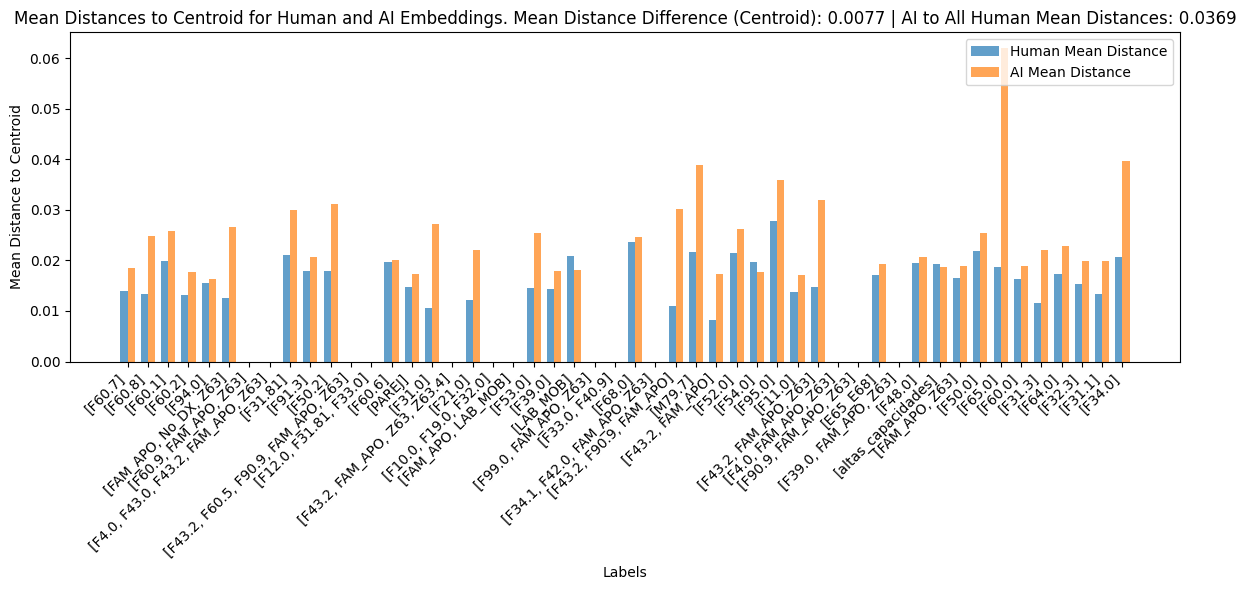

In [13]:
# 1) media de la diferencia centroidal (ignorando posibles NaN)
mean_distance_difference_centroid = np.nanmean(human_ai_distances_differences_centroid)
# 2) media de la distancia IA → todos humanos
mean_ai_to_all_human_distance = np.nanmean(ai_to_all_human_mean_distances)

evaluacion_dataset['mean_distance_difference_centroid'] = mean_distance_difference_centroid
evaluacion_dataset['mean_ai_to_all_human_distance'] = mean_ai_to_all_human_distance

labels_to_process = [label.replace("'", "") for label in labels_to_process]
x = np.arange(len(labels_to_process))
width = 0.35
plt.figure(figsize=(12, 6))
plt.bar(x - width/2, human_mean_distances, width, label='Human Mean Distance', alpha=0.7)
plt.bar(x + width/2, ai_mean_distances, width, label='AI Mean Distance', alpha=0.7)
plt.xlabel('Labels')
plt.ylabel('Mean Distance to Centroid')
plt.title(f'Mean Distances to Centroid for Human and AI Embeddings. Mean Distance Difference (Centroid): {mean_distance_difference_centroid:.4f} | AI to All Human Mean Distances: {np.mean(ai_to_all_human_mean_distances):.4f}')
plt.xticks(x, labels_to_process, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [14]:
evaluacion_dataset

{'mean_distance_difference_centroid': 0.0077425133738968826,
 'mean_ai_to_all_human_distance': 0.03687241889536381}

## N-gramas para estudiar la diversidad

Consiste en estudiar los N-gramas que aparecen en los diagnósticos de cada etiqueta, para ver cuánto se repiten, tanto solo en los humanos como en los generados artificialmente.

### A nivel de etiqueta

In [15]:
labels_to_process

['[F60.7]',
 '[F60.8]',
 '[F60.1]',
 '[F60.2]',
 '[F94.0]',
 '[FAM_APO, No_DX, Z63]',
 '[F60.9, FAM_APO, Z63]',
 '[F4.0, F43.0, F43.2, FAM_APO, Z63]',
 '[F31.81]',
 '[F91.3]',
 '[F50.2]',
 '[F43.2, F60.5, F90.9, FAM_APO, Z63]',
 '[F12.0, F31.81, F33.0]',
 '[F60.6]',
 '[PAREJ]',
 '[F31.0]',
 '[F43.2, FAM_APO, Z63, Z63.4]',
 '[F21.0]',
 '[F10.0, F19.0, F32.0]',
 '[FAM_APO, LAB_MOB]',
 '[F53.0]',
 '[F39.0]',
 '[LAB_MOB]',
 '[F99.0, FAM_APO, Z63]',
 '[F33.0, F40.9]',
 '[F68.0]',
 '[F34.1, F42.0, FAM_APO, Z63]',
 '[F43.2, F90.9, FAM_APO]',
 '[M79.7]',
 '[F43.2, FAM_APO]',
 '[F52.0]',
 '[F54.0]',
 '[F95.0]',
 '[F11.0]',
 '[F43.2, FAM_APO, Z63]',
 '[F4.0, FAM_APO, Z63]',
 '[F90.9, FAM_APO, Z63]',
 '[E65_E68]',
 '[F39.0, FAM_APO, Z63]',
 '[F48.0]',
 '[altas_capacidades]',
 '[FAM_APO, Z63]',
 '[F50.0]',
 '[F65.0]',
 '[F60.0]',
 '[F31.3]',
 '[F64.0]',
 '[F32.3]',
 '[F31.1]',
 '[F34.0]']

In [16]:
resultados = []

for i, label in enumerate(labels_to_process):
    print(f'Procesando etiqueta {i+1}/{len(labels_to_process)}: {label}')
    human_subset = data_human[data_human['Diagnosticos_normalizados'] == label]['Descripcion_diagnosticos'].to_list()
    ai_subset = data_generated[data_generated['Diagnosticos_normalizados'] == label]['Descripcion_diagnosticos'].to_list()
    print(f'Tamaño humanos: {len(human_subset)}, tamaño IA: {len(ai_subset)}')

    dic_results = {
        'etiqueta': label,
        'tam_humanos': len(human_subset),
        'tam_ia': len(ai_subset),
    }

    bigrams_result = evaluar_ngramas(human_subset, ai_subset, 2)
    trigrams_result = evaluar_ngramas(human_subset, ai_subset, 3)
    dic_results.update(bigrams_result)
    dic_results.update(trigrams_result)

    print(f"Fracción de bigramas sintéticos que aparecen en reales: {bigrams_result['frac_comunes_ai_2gram']:.3f}")
    print(f"Fracción de bigramas reales cubiertos por sintéticos: {bigrams_result['frac_comunes_human_2gram']:.3f}")
    print(f"Bigramas únicos sintéticos (proporción): {bigrams_result['unicos_ai_prop_2gram']}")
    print(f"Bigramas únicos reales (proporción): {bigrams_result['unicos_human_prop_2gram']}")
    print(f"Bigramas sintéticos novedosos: {bigrams_result['novedad_2gram']}")
    print(f"1- BLEU bigramas: {bigrams_result['one_minus_bleu_2gram']:.3f}")
    print(f"Novelty bigramas: {bigrams_result['novelty_n_2gram']}")
    print(f"Distinct bigramas: {bigrams_result['distinct_n_2gram']}")
    print(f"Self-BLEU bigramas: {bigrams_result['self_bleu_2gram']:.3f}")
    print('---')
    print(f"Fracción de trigramas sintéticos que aparecen en reales: {trigrams_result['frac_comunes_ai_3gram']:.3f}")
    print(f"Fracción de trigramas reales cubiertos por sintéticos: {trigrams_result['frac_comunes_human_3gram']:.3f}")
    print(f"Trigramas únicos sintéticos (proporción): {trigrams_result['unicos_ai_prop_3gram']}")
    print(f"Trigramas únicos reales (proporción): {trigrams_result['unicos_human_prop_3gram']}")
    print(f"Trigramas sintéticos novedosos: {trigrams_result['novedad_3gram']}")
    print(f"1- BLEU trigramas: {trigrams_result['one_minus_bleu_3gram']:.3f}")
    print(f"Novelty trigramas: {trigrams_result['novelty_n_3gram']}")
    print(f"Distinct trigramas: {trigrams_result['distinct_n_3gram']}")
    print(f"Self-BLEU trigramas: {trigrams_result['self_bleu_3gram']:.3f}")
    print('---')

    resultados.append(dic_results)

df_resultados = pd.DataFrame(resultados)
df_resultados

Procesando etiqueta 1/50: [F60.7]
Tamaño humanos: 67, tamaño IA: 65
Fracción de bigramas sintéticos que aparecen en reales: 0.090
Fracción de bigramas reales cubiertos por sintéticos: 0.110
Bigramas únicos sintéticos (proporción): 1.4615384615384615
Bigramas únicos reales (proporción): 1.2238805970149254
Bigramas sintéticos novedosos: 92
1- BLEU bigramas: 0.997
Novelty bigramas: 0.9100719424460432
Distinct bigramas: 0.34172661870503596
Self-BLEU bigramas: 0.049
---
Fracción de trigramas sintéticos que aparecen en reales: 0.000
Fracción de trigramas reales cubiertos por sintéticos: 0.000
Trigramas únicos sintéticos (proporción): 1.6615384615384616
Trigramas únicos reales (proporción): 1.1492537313432836
Trigramas sintéticos novedosos: 108
1- BLEU trigramas: 0.997
Novelty trigramas: 1.0
Distinct trigramas: 0.5070422535211268
Self-BLEU trigramas: 0.049
---
Procesando etiqueta 2/50: [F60.8]
Tamaño humanos: 15, tamaño IA: 395
Fracción de bigramas sintéticos que aparecen en reales: 0.000
Fra

,etiqueta,tam_humanos,tam_ia,frac_comunes_ai_2gram,frac_comunes_human_2gram,unicos_ai_prop_2gram,unicos_human_prop_2gram,novedad_2gram,one_minus_bleu_2gram,novelty_n_2gram,...,self_bleu_2gram,frac_comunes_ai_3gram,frac_comunes_human_3gram,unicos_ai_prop_3gram,unicos_human_prop_3gram,novedad_3gram,one_minus_bleu_3gram,novelty_n_3gram,distinct_n_3gram,self_bleu_3gram
0,[F60.7],67,65,0.089928,0.110132,1.461538,1.223881,92,0.996911,0.910072,...,0.049248,0.000000,0.000000,1.661538,1.149254,108,0.996911,1.000000,0.507042,0.049248
1,[F60.8],15,395,0.000000,0.000000,0.539241,2.133333,213,0.990501,1.000000,...,0.145438,0.000000,0.000000,0.688608,1.800000,272,0.990501,1.000000,0.192362,0.145438
2,[F60.1],5,410,0.000000,0.000000,0.521951,2.800000,214,0.978012,1.000000,...,0.153349,0.000000,0.000000,0.656098,2.400000,269,0.978012,1.000000,0.176047,0.153349
3,[F60.2],15,310,0.119527,1.017751,0.693548,8.133333,208,0.998408,0.880473,...,0.130481,0.000000,0.000000,0.880645,8.466667,273,0.998408,1.000000,0.241807,0.130481
4,[F94.0],70,265,0.187700,1.000000,0.777358,2.028571,197,0.992302,0.812300,...,0.096774,0.051672,0.307229,0.958491,1.871429,252,0.992302,0.948328,0.257345,0.096774
5,"[FAM_APO, No_DX, Z63]",3,50,0.007273,0.105263,2.600000,6.333333,129,0.981561,0.992727,...,0.049766,0.000000,0.000000,2.840000,5.333333,142,0.981561,1.000000,0.631111,0.049766
6,"[F60.9, FAM_APO, Z63]",1,15,0.172414,1.538462,4.533333,13.000000,64,0.834614,0.827586,...,0.133932,0.009901,0.083333,5.333333,12.000000,79,0.834614,0.990099,0.792079,0.133932
7,"[F4.0, F43.0, F43.2, FAM_APO, Z63]",1,20,0.000000,0.000000,2.050000,4.000000,41,0.884784,1.000000,...,0.287216,0.000000,0.000000,1.700000,3.000000,34,0.884784,1.000000,0.653846,0.287216
8,[F31.81],127,50,0.079498,0.031667,1.600000,1.960630,78,0.997139,0.920502,...,0.064486,0.000000,0.000000,1.660000,2.118110,83,0.997139,1.000000,0.439153,0.064486
9,[F91.3],55,270,0.063260,0.419355,0.659259,2.345455,173,0.996720,0.936740,...,0.042059,0.001038,0.007353,0.840741,2.218182,226,0.996720,0.998962,0.235722,0.042059


### A nivel global

In [17]:
human_texts = data_human['Descripcion_diagnosticos'].dropna().tolist()
ai_texts = data_generated['Descripcion_diagnosticos'].dropna().tolist()

eval_bigrams = evaluar_ngramas(human_texts, ai_texts, n=2)
eval_trigrams = evaluar_ngramas(human_texts, ai_texts, n=3)

evaluacion_dataset.update(eval_bigrams)
evaluacion_dataset.update(eval_trigrams)

for k, v in evaluacion_dataset.items():
    print(f'{k}: {v:.3f}')

mean_distance_difference_centroid: 0.008
mean_ai_to_all_human_distance: 0.037
frac_comunes_ai_2gram: 0.827
frac_comunes_human_2gram: 0.098
unicos_ai_prop_2gram: 0.151
unicos_human_prop_2gram: 0.801
novedad_2gram: 659.000
one_minus_bleu_2gram: 0.999
novelty_n_2gram: 0.173
distinct_n_2gram: 0.032
self_bleu_2gram: 0.009
frac_comunes_ai_3gram: 0.548
frac_comunes_human_3gram: 0.063
unicos_ai_prop_3gram: 0.250
unicos_human_prop_3gram: 1.414
novedad_3gram: 1734.000
one_minus_bleu_3gram: 0.999
novelty_n_3gram: 0.452
distinct_n_3gram: 0.066
self_bleu_3gram: 0.009


In [18]:
evaluacion_dataset

{'mean_distance_difference_centroid': 0.0077425133738968826,
 'mean_ai_to_all_human_distance': 0.03687241889536381,
 'frac_comunes_ai_2gram': 0.8270463663812715,
 'frac_comunes_human_2gram': 0.09783730886850153,
 'unicos_ai_prop_2gram': 0.15126550868486352,
 'unicos_human_prop_2gram': 0.801032284181763,
 'novedad_2gram': 659,
 'one_minus_bleu_2gram': 0.9986049683975626,
 'novelty_n_2gram': 0.17295363361872854,
 'distinct_n_2gram': 0.03151755800967862,
 'self_bleu_2gram': 0.00925597175566402,
 'frac_comunes_ai_3gram': 0.547898325452598,
 'frac_comunes_human_3gram': 0.06287605565398832,
 'unicos_ai_prop_3gram': 0.24962779156327544,
 'unicos_human_prop_3gram': 1.4135461997773504,
 'novedad_3gram': 1734,
 'one_minus_bleu_3gram': 0.9986049683975626,
 'novelty_n_3gram': 0.45210167454740197,
 'distinct_n_3gram': 0.06570182084171478,
 'self_bleu_3gram': 0.00925597175566402}

## Modelo para detectar entre texto humano o generado por IA

In [19]:
classifier = FakespotAIDetectorModel()

Device set to use cuda:0


In [20]:
preds = classifier.predict(data_generated)

Clasificando: 100%|██████████| 315/315 [00:59<00:00,  5.26it/s]


In [21]:
accuracy = calculate_ai_human_metrics(torch.tensor(preds), data_generated)
evaluacion_dataset['ai_detection_accuracy'] = accuracy
evaluacion_dataset

Accuracy: 0.0108


{'mean_distance_difference_centroid': 0.0077425133738968826,
 'mean_ai_to_all_human_distance': 0.03687241889536381,
 'frac_comunes_ai_2gram': 0.8270463663812715,
 'frac_comunes_human_2gram': 0.09783730886850153,
 'unicos_ai_prop_2gram': 0.15126550868486352,
 'unicos_human_prop_2gram': 0.801032284181763,
 'novedad_2gram': 659,
 'one_minus_bleu_2gram': 0.9986049683975626,
 'novelty_n_2gram': 0.17295363361872854,
 'distinct_n_2gram': 0.03151755800967862,
 'self_bleu_2gram': 0.00925597175566402,
 'frac_comunes_ai_3gram': 0.547898325452598,
 'frac_comunes_human_3gram': 0.06287605565398832,
 'unicos_ai_prop_3gram': 0.24962779156327544,
 'unicos_human_prop_3gram': 1.4135461997773504,
 'novedad_3gram': 1734,
 'one_minus_bleu_3gram': 0.9986049683975626,
 'novelty_n_3gram': 0.45210167454740197,
 'distinct_n_3gram': 0.06570182084171478,
 'self_bleu_3gram': 0.00925597175566402,
 'ai_detection_accuracy': 0.010818858560794046}

## Train Model

In [22]:
best_f1_train, best_f1_val, best_f1_test = run_model_training_embeddings_to_classification_model(dataset_to_be_evaluated_name)

train: 0.776, val: 0.112, test: 0.112
🔹 Epoch 01 / 20


Batches (eval): 100%|██████████| 94/94 [00:37<00:00,  2.49it/s]


Epoch [01]  train f1=0.3370 | val f1=0.6091
🔹 Epoch 02 / 20


Batches (eval): 100%|██████████| 94/94 [00:37<00:00,  2.48it/s]


Epoch [02]  train f1=0.5438 | val f1=0.6439
🔹 Epoch 03 / 20


Batches (eval): 100%|██████████| 94/94 [00:37<00:00,  2.49it/s]


Epoch [03]  train f1=0.5855 | val f1=0.6742
🔹 Epoch 04 / 20


Batches (eval): 100%|██████████| 94/94 [00:37<00:00,  2.48it/s]


Epoch [04]  train f1=0.6025 | val f1=0.6809
🔹 Epoch 05 / 20


Batches (eval): 100%|██████████| 94/94 [00:37<00:00,  2.48it/s]


Epoch [05]  train f1=0.6158 | val f1=0.6826
🔹 Epoch 06 / 20


Batches (eval): 100%|██████████| 94/94 [00:37<00:00,  2.48it/s]


Epoch [06]  train f1=0.6236 | val f1=0.6881
🔹 Epoch 07 / 20


Batches (eval): 100%|██████████| 94/94 [00:37<00:00,  2.49it/s]


Epoch [07]  train f1=0.6299 | val f1=0.6851
🔹 Epoch 08 / 20


Batches (eval): 100%|██████████| 94/94 [00:37<00:00,  2.48it/s]


Epoch [08]  train f1=0.6365 | val f1=0.7043
🔹 Epoch 09 / 20


Batches (eval): 100%|██████████| 94/94 [00:37<00:00,  2.48it/s]


Epoch [09]  train f1=0.6410 | val f1=0.7049
🔹 Epoch 10 / 20


Batches (eval): 100%|██████████| 94/94 [00:37<00:00,  2.48it/s]


Epoch [10]  train f1=0.6445 | val f1=0.7078
🔹 Epoch 11 / 20


Batches (eval): 100%|██████████| 94/94 [00:37<00:00,  2.48it/s]


Epoch [11]  train f1=0.6501 | val f1=0.7086
🔹 Epoch 12 / 20


Batches (eval): 100%|██████████| 94/94 [00:37<00:00,  2.48it/s]


Epoch [12]  train f1=0.6520 | val f1=0.7083
🔹 Epoch 13 / 20


Batches (eval): 100%|██████████| 94/94 [00:37<00:00,  2.48it/s]


Epoch [13]  train f1=0.6556 | val f1=0.7144
🔹 Epoch 14 / 20


Batches (eval): 100%|██████████| 94/94 [00:37<00:00,  2.48it/s]


Epoch [14]  train f1=0.6581 | val f1=0.7115
🔹 Epoch 15 / 20


Batches (eval): 100%|██████████| 94/94 [00:37<00:00,  2.48it/s]


Epoch [15]  train f1=0.6614 | val f1=0.7114
🔹 Epoch 16 / 20


Batches (eval): 100%|██████████| 94/94 [00:38<00:00,  2.47it/s]


Epoch [16]  train f1=0.6633 | val f1=0.7063
🔹 Epoch 17 / 20


Batches (eval): 100%|██████████| 94/94 [00:37<00:00,  2.48it/s]


Epoch [17]  train f1=0.6672 | val f1=0.7188
🔹 Epoch 18 / 20


Batches (eval): 100%|██████████| 94/94 [00:38<00:00,  2.47it/s]


Epoch [18]  train f1=0.6675 | val f1=0.7203
🔹 Epoch 19 / 20


Batches (eval): 100%|██████████| 94/94 [00:37<00:00,  2.48it/s]


Epoch [19]  train f1=0.6691 | val f1=0.7156
🔹 Epoch 20 / 20


Batches (eval): 100%|██████████| 94/94 [00:37<00:00,  2.48it/s]


Epoch [20]  train f1=0.6716 | val f1=0.7114


Batches (eval): 100%|██████████| 93/93 [00:37<00:00,  2.47it/s]


🔹 Best F1 (train) baseline: 0.7058
🔹 Best F1 (val) baseline: 0.7114
🔹 Best F1 (test) baseline: 0.7119
📦 Model saved as optuna/Embeddings_to_classification_model_MODEL_openai_MODELNAME_gpt-4o-mini_UMBRALMIN_500_CANTXCALL_5_MAXINP_5_TEMP_0.5_FREQPEN_0.0_PRESENCEPEN_0.0.pt


## Exportar métricas

In [23]:
evaluacion_dataset['best_f1_train'] = best_f1_train 
evaluacion_dataset['best_f1_val'] = best_f1_val
evaluacion_dataset['best_f1_test'] = best_f1_test
evaluacion_dataset

{'mean_distance_difference_centroid': 0.0077425133738968826,
 'mean_ai_to_all_human_distance': 0.03687241889536381,
 'frac_comunes_ai_2gram': 0.8270463663812715,
 'frac_comunes_human_2gram': 0.09783730886850153,
 'unicos_ai_prop_2gram': 0.15126550868486352,
 'unicos_human_prop_2gram': 0.801032284181763,
 'novedad_2gram': 659,
 'one_minus_bleu_2gram': 0.9986049683975626,
 'novelty_n_2gram': 0.17295363361872854,
 'distinct_n_2gram': 0.03151755800967862,
 'self_bleu_2gram': 0.00925597175566402,
 'frac_comunes_ai_3gram': 0.547898325452598,
 'frac_comunes_human_3gram': 0.06287605565398832,
 'unicos_ai_prop_3gram': 0.24962779156327544,
 'unicos_human_prop_3gram': 1.4135461997773504,
 'novedad_3gram': 1734,
 'one_minus_bleu_3gram': 0.9986049683975626,
 'novelty_n_3gram': 0.45210167454740197,
 'distinct_n_3gram': 0.06570182084171478,
 'self_bleu_3gram': 0.00925597175566402,
 'ai_detection_accuracy': 0.010818858560794046,
 'best_f1_train': 0.7058457460600996,
 'best_f1_val': 0.7113817497985134,

In [24]:
record = {
    **dataset_parameters,
    **evaluacion_dataset
}
record

{'creation_timestamp': '2025-06-25T08:26:07.546748',
 'Model': 'openai',
 'Model_name': 'gpt-4o-mini',
 'Umbral_minimo': 500,
 'Cantidad_a_generar_por_llamada': 5,
 'Max_ejemplos_input': 5,
 'Temperature': 0.5,
 'Frequency_penalty': 0.0,
 'Presence_penalty': 0.0,
 'mean_distance_difference_centroid': 0.0077425133738968826,
 'mean_ai_to_all_human_distance': 0.03687241889536381,
 'frac_comunes_ai_2gram': 0.8270463663812715,
 'frac_comunes_human_2gram': 0.09783730886850153,
 'unicos_ai_prop_2gram': 0.15126550868486352,
 'unicos_human_prop_2gram': 0.801032284181763,
 'novedad_2gram': 659,
 'one_minus_bleu_2gram': 0.9986049683975626,
 'novelty_n_2gram': 0.17295363361872854,
 'distinct_n_2gram': 0.03151755800967862,
 'self_bleu_2gram': 0.00925597175566402,
 'frac_comunes_ai_3gram': 0.547898325452598,
 'frac_comunes_human_3gram': 0.06287605565398832,
 'unicos_ai_prop_3gram': 0.24962779156327544,
 'unicos_human_prop_3gram': 1.4135461997773504,
 'novedad_3gram': 1734,
 'one_minus_bleu_3gram': 0

In [ ]:
LOG_PATH = "../metrics/metrics.csv"

new_row = pd.DataFrame([record])

def is_duplicate_row(df, new_row, tol=1e-8):
    """
    Devuelve True si hay una fila en df que es idéntica a new_row (con tolerancia para floats)
    """
    for idx, row in df.iterrows():
        match = True
        for col in new_row.columns:
            val1 = row[col]
            val2 = new_row.iloc[0][col]
            if pd.api.types.is_numeric_dtype(type(val1)):
                if not np.isclose(val1, val2, atol=tol, equal_nan=True):
                    match = False
                    break
            else:
                if pd.isna(val1) and pd.isna(val2):
                    continue
                if val1 != val2:
                    match = False
                    break
        if match:
            return True
    return False

if os.path.exists(LOG_PATH):
    df = pd.read_csv(LOG_PATH)

    new_row = new_row[df.columns]

    if not is_duplicate_row(df, new_row):
        df = pd.concat([df, new_row], ignore_index=True)
        df.to_csv(LOG_PATH, index=False)
        print("✅ Registro añadido.")
    else:
        print("⚠️ Registro duplicado: no se añadió.")
else:
    df = new_row
    df.to_csv(LOG_PATH, index=False)
    print("✅ Primer registro guardado.")

df

✅ Registro añadido.


,creation_timestamp,Model,Model_name,Umbral_minimo,Cantidad_a_generar_por_llamada,Max_ejemplos_input,Temperature,Frequency_penalty,Presence_penalty,mean_distance_difference_centroid,...,novedad_2gram,frac_comunes_ai_3gram,frac_comunes_human_3gram,unicos_ai_prop_3gram,unicos_human_prop_3gram,novedad_3gram,ai_detection_accuracy,best_f1_train,best_f1_val,best_f1_test
0,2025-06-14T18:02:22.146208,vllm,meta-llama/Llama-3.2-3B-Instruct,100,5,5,0.5,0.0,0.0,0.005338,...,349,0.577487,0.006613,2.131757,1.413546,840,0.050676,0.754117,0.730574,0.732472
1,2025-06-21T13:04:17.479032,vllm,meta-llama/Llama-3.2-3B-Instruct,250,5,5,0.5,0.0,0.0,0.008238,...,838,0.637788,0.042706,0.954775,1.413546,2208,0.116698,0.733991,0.721180,0.722373
2,2025-06-21T15:14:27.586185,vllm,meta-llama/Llama-3.2-3B-Instruct,500,5,5,0.5,0.0,0.0,0.007728,...,1541,0.659770,0.134317,0.535168,1.413546,4188,0.110355,0.713850,0.726061,0.728346
3,2025-06-22T12:47:12.686526,vllm,meta-llama/Llama-3.2-3B-Instruct,1000,5,5,0.5,0.0,0.0,0.006556,...,2523,0.663020,0.387962,0.286889,1.413546,7010,0.109206,0.643945,0.719537,0.720432
4,2025-06-22T23:10:48.988651,vllm,meta-llama/Llama-3.2-3B-Instruct,100,5,5,0.5,1.0,1.0,0.009674,...,940,0.410286,0.005285,3.806240,1.413546,1814,0.131363,0.751931,0.729806,0.732474
5,2025-06-24T17:10:53.864571,vllm,meta-llama/Llama-3.2-3B-Instruct,250,5,5,0.5,1.0,1.0,0.009491,...,2461,0.426472,0.026013,1.959558,1.413546,5251,0.130174,0.731898,0.719207,0.723308
6,2025-06-24T11:40:52.361259,vllm,meta-llama/Llama-3.2-3B-Instruct,500,5,5,0.5,1.0,1.0,0.009212,...,4925,0.423808,0.079602,1.216607,1.413546,10830,0.130183,0.705391,0.721708,0.722255
7,2025-06-23T02:10:48.226744,vllm,meta-llama/Llama-3.2-3B-Instruct,1000,5,5,0.5,1.0,1.0,0.007809,...,8813,0.428468,0.237918,0.764211,1.413546,20760,0.134401,0.636478,0.715564,0.717498
8,2025-06-21T18:45:31.546328,openai,gpt-4o-mini,100,5,5,0.5,0.0,0.0,0.010098,...,206,0.600145,0.004950,1.387097,1.413546,494,0.008065,0.747065,0.724721,0.726759
9,2025-06-21T20:22:56.733033,openai,gpt-4o-mini,250,5,5,0.5,0.0,0.0,0.008630,...,411,0.561243,0.020908,0.511774,1.413546,1060,0.010047,0.737841,0.724448,0.725517
